In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df = pd.read_csv('/Users/Owner/Desktop/train.csv', sep=";")

In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [15]:
# Step 4: Checking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [16]:
# Check the value counts for each categorical column
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for job:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Value counts for marital:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

Value counts for education:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Value counts for default:
default
no     44396
yes      815
Name: count, dtype: int64

Value counts for housing:
housing
yes    25130
no     20081
Name: count, dtype: int64

Value counts for loan:
loan
no     37967
yes     7244
Name: count, dtype: int64

Value counts for contact:
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

Value counts for month:
month
may    13766
jul     68

In [17]:
#EDA

In [18]:
# Create a new column 'y_binary' to store the binary encoding of 'y'
df['y_binary'] = df['y'].map({'yes': 1, 'no': 0})

# Verify the new column
print(df[['y', 'y_binary']].head())


    y  y_binary
0  no         0
1  no         0
2  no         0
3  no         0
4  no         0


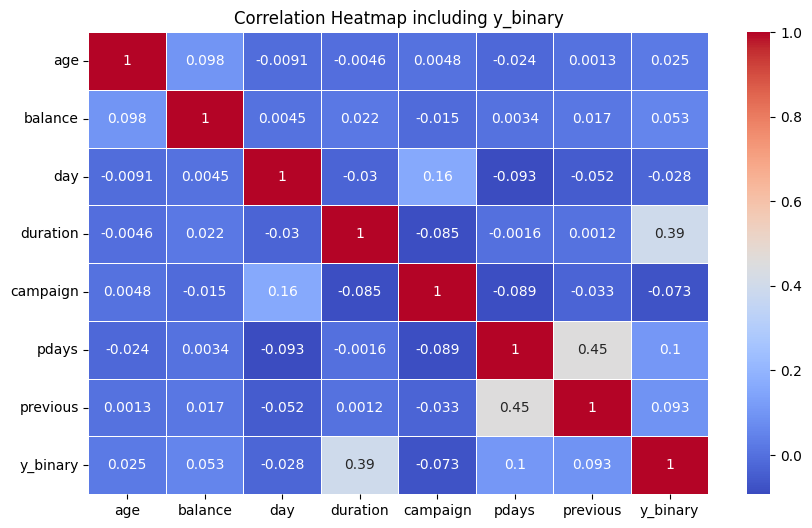

In [19]:
# List of numerical columns excluding y_binary for other plots
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# List of numerical columns including 'y_binary' for the correlation heatmap
numerical_columns_with_y = numerical_columns + ['y_binary']

# Correlation heatmap including 'y_binary'
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_columns_with_y].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap including y_binary')
plt.show()


In [20]:
### numerical variables zhiyou duration you yingxiang

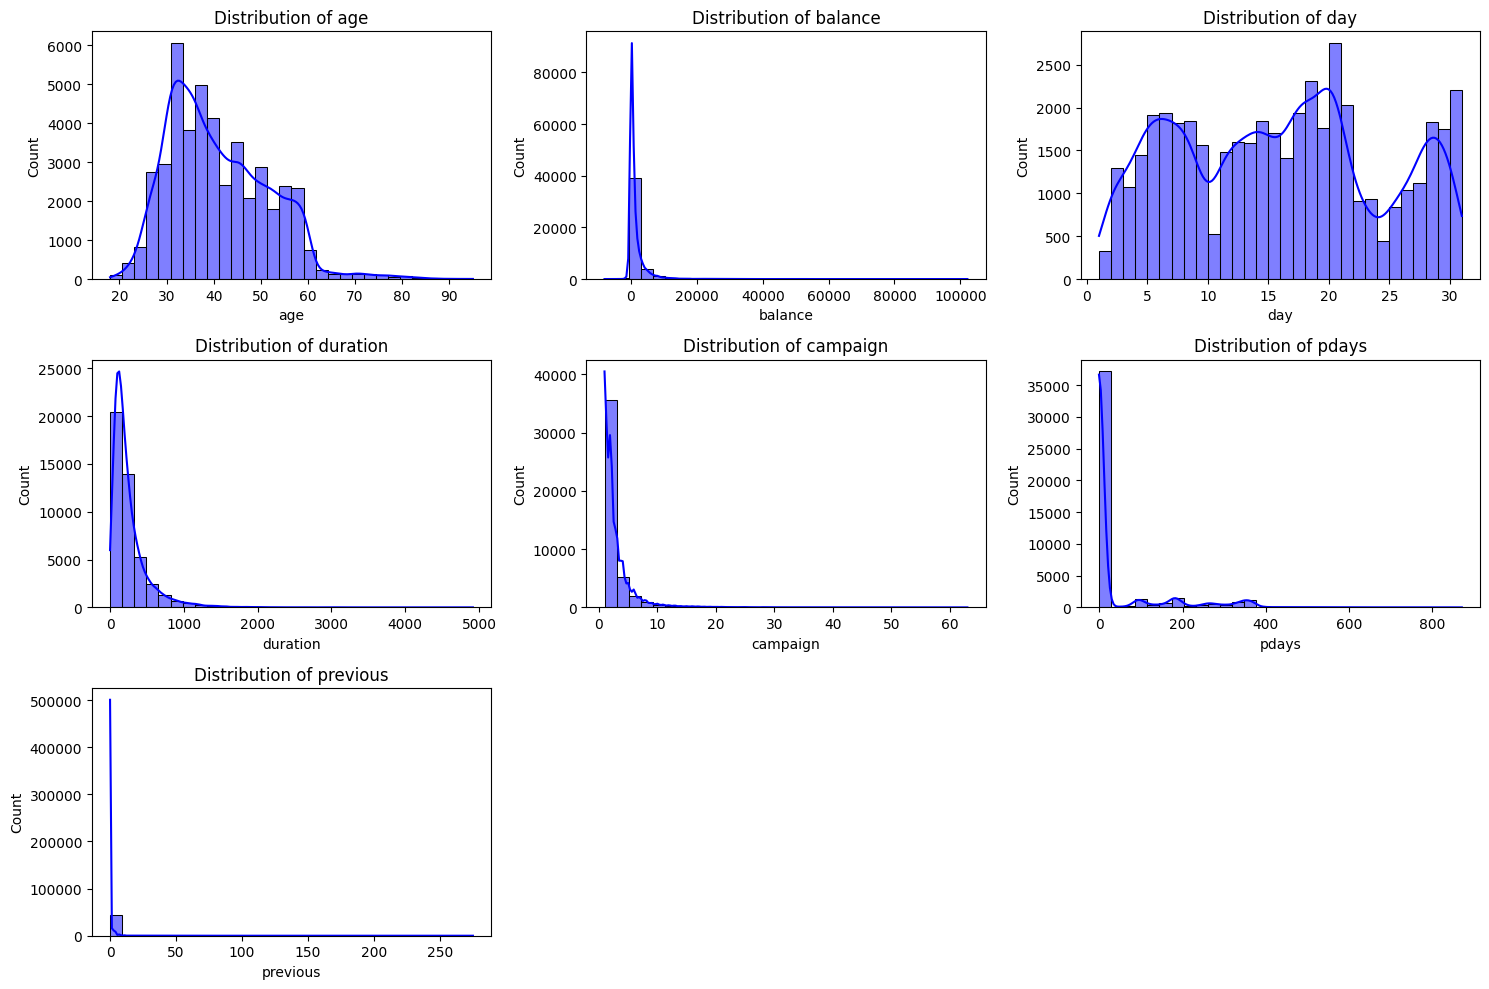

In [21]:
# Plot histograms for numerical variables excluding 'y_binary'
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


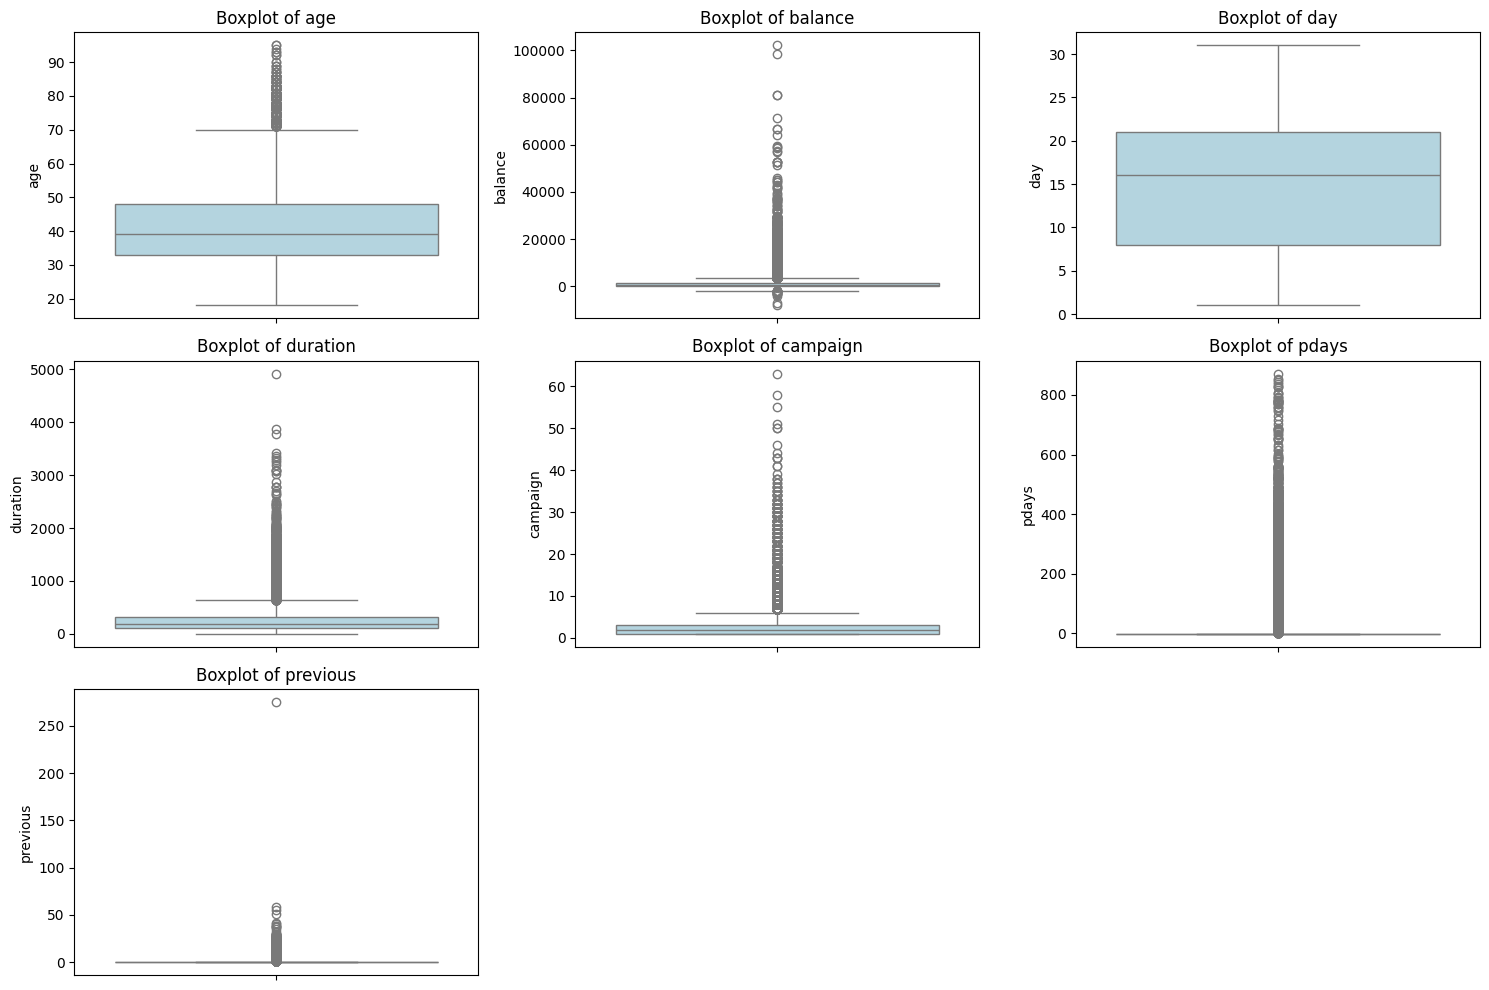

In [22]:
# Plot boxplots for numerical variables excluding 'y_binary'
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


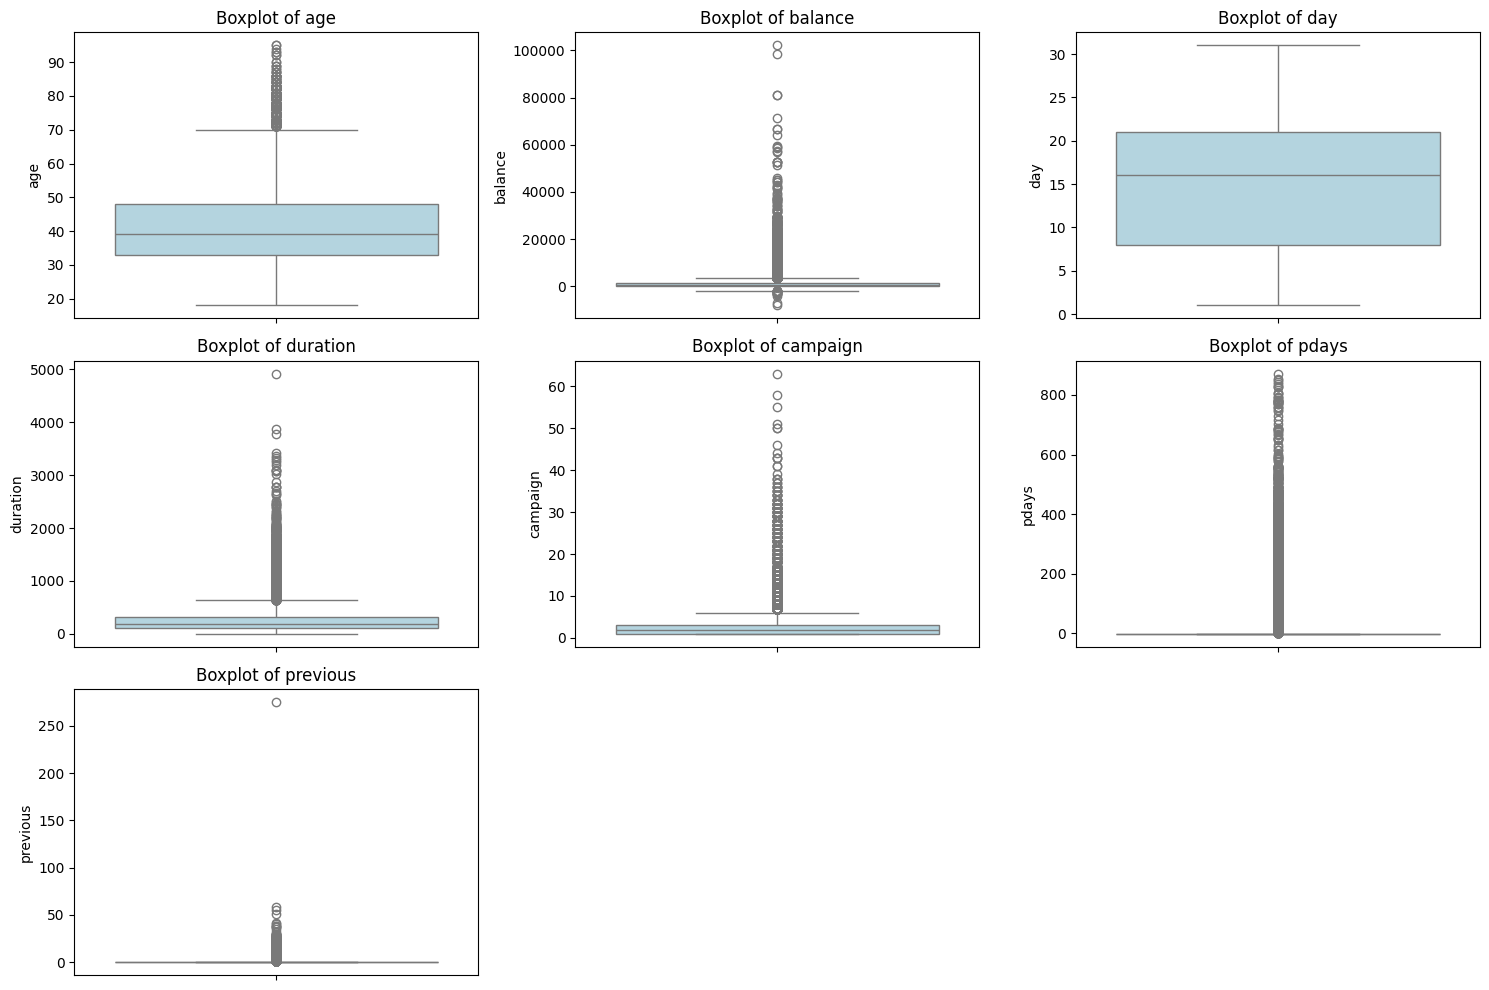

In [23]:
# Add boxplot for detecting outliers in numerical columns
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()



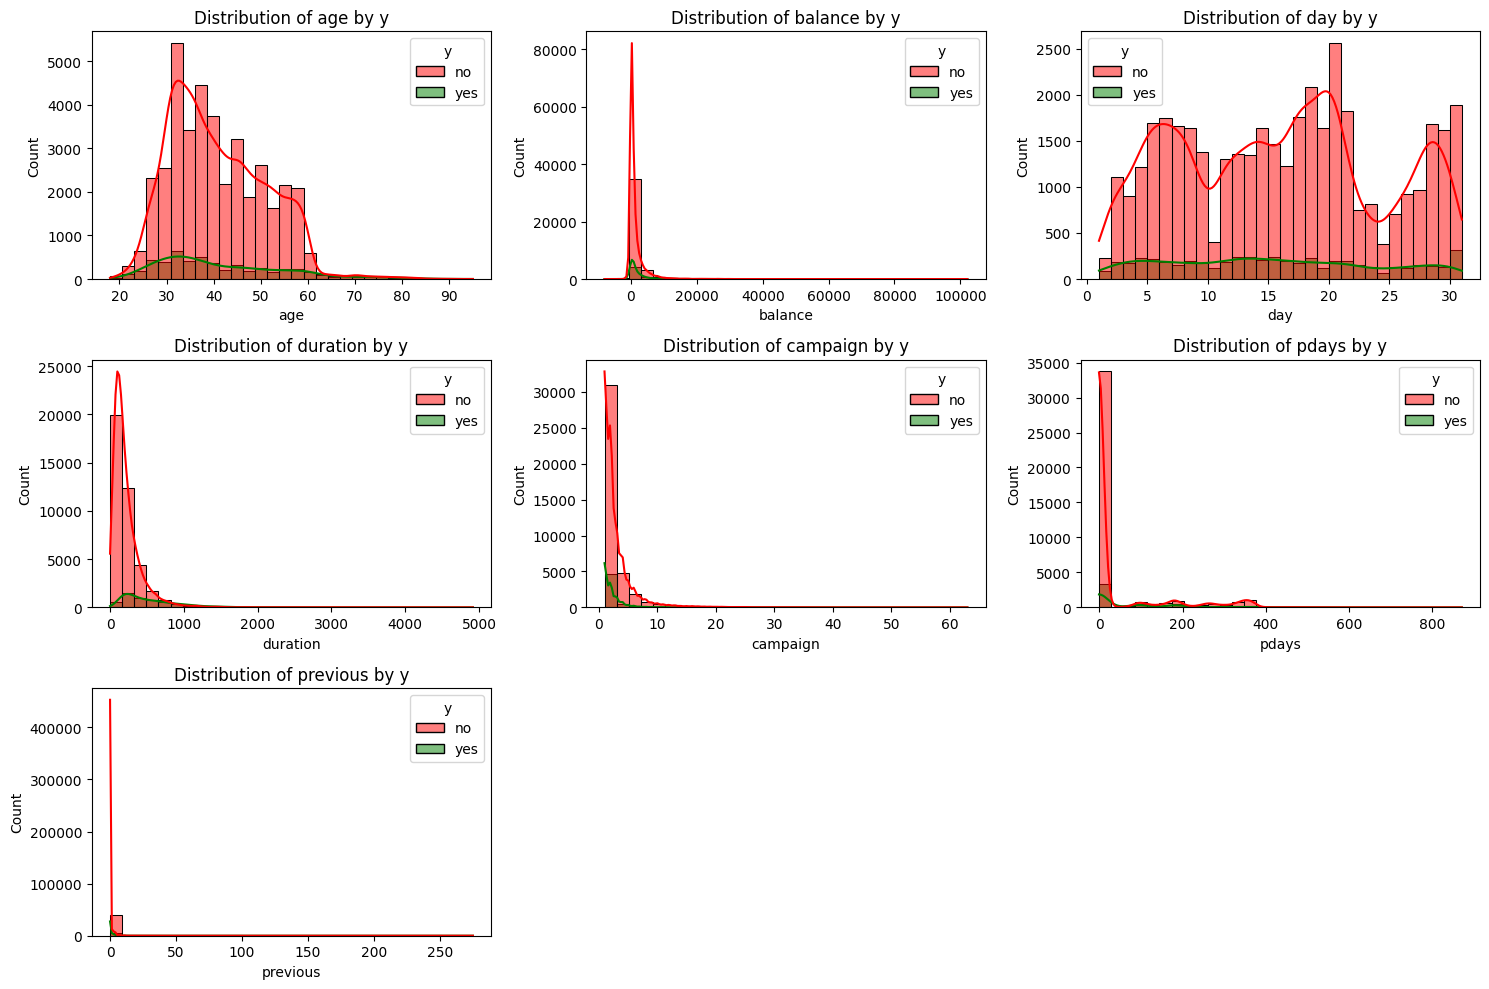

In [24]:
# Plot histograms for numerical variables, split by 'y' (yes and no)
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df, x=col, hue='y', kde=True, bins=30, palette={'yes': 'green', 'no': 'red'})
    plt.title(f'Distribution of {col} by y')

plt.tight_layout()
plt.show()


/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_1731/2998801274.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=col, data=df, palette={'yes': 'green', 'no': 'red'})
/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_1731/2998801274.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=col, data=df, palette={'yes': 'green', 'no': 'red'})
/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_1731/2998801274.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=col, data=df, palette={'yes': 'gr

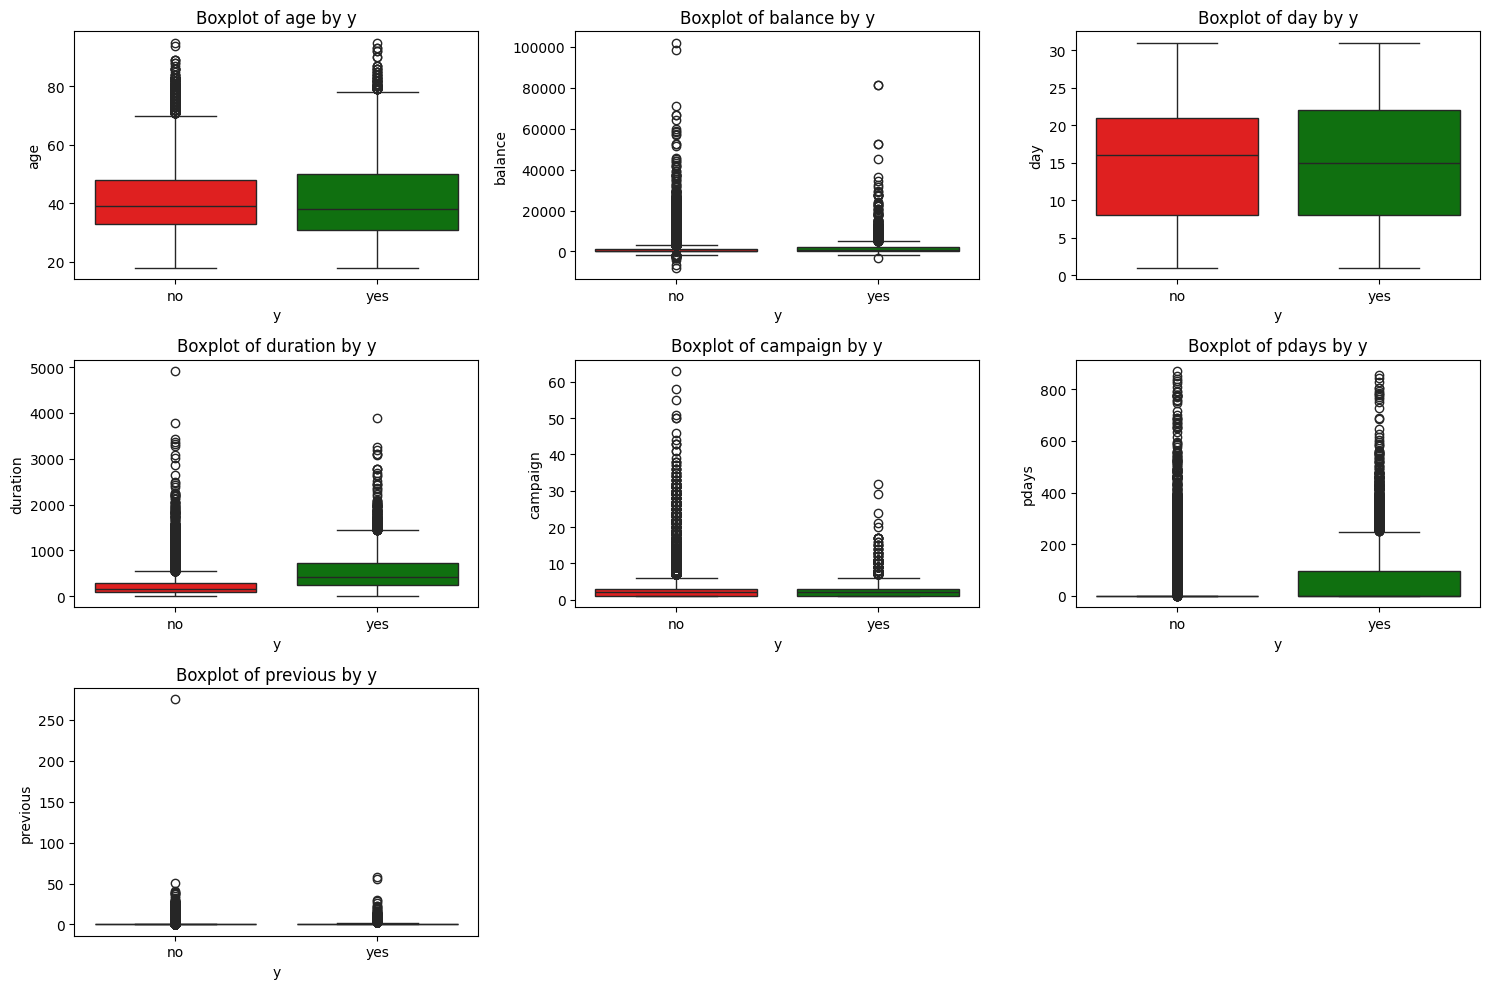

In [25]:
# Plot boxplots for numerical variables, split by 'y' (yes and no)
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='y', y=col, data=df, palette={'yes': 'green', 'no': 'red'})
    plt.title(f'Boxplot of {col} by y')

plt.tight_layout()
plt.show()


In [26]:
# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Display value counts for each categorical column
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for job:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Value counts for marital:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

Value counts for education:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Value counts for default:
default
no     44396
yes      815
Name: count, dtype: int64

Value counts for housing:
housing
yes    25130
no     20081
Name: count, dtype: int64

Value counts for loan:
loan
no     37967
yes     7244
Name: count, dtype: int64

Value counts for contact:
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

Value counts for month:
month
may    13766
jul     68

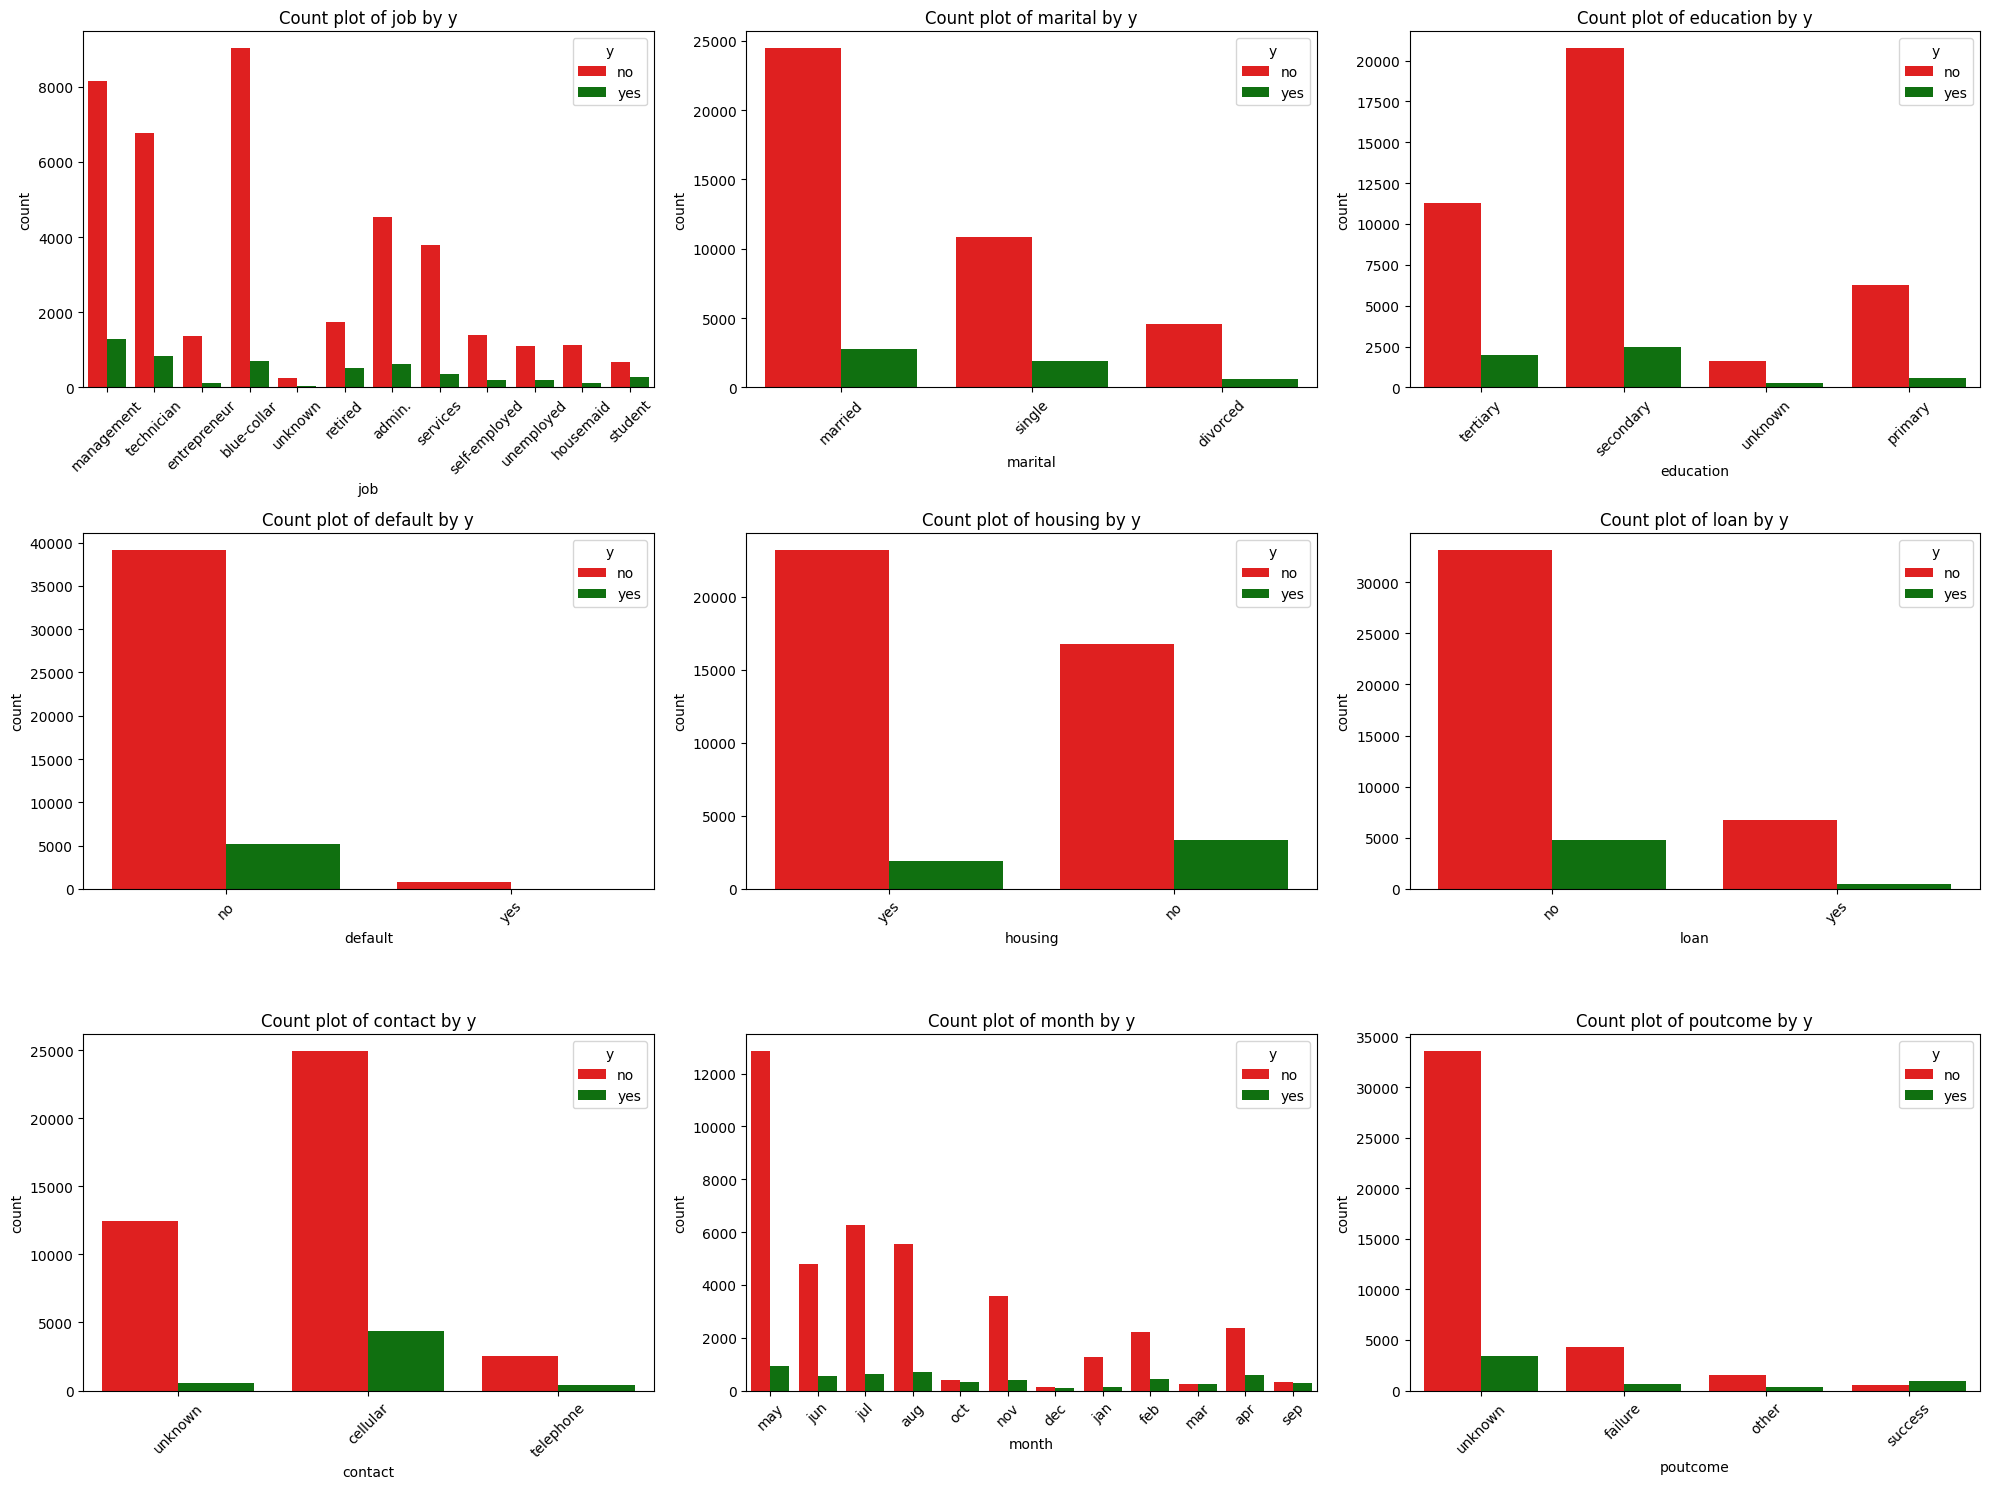

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot count plots for each categorical variable, split by 'y'
plt.figure(figsize=(20, 15))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue='y', palette={'yes': 'green', 'no': 'red'})
    plt.title(f'Count plot of {col} by y')
    plt.xticks(rotation=45)  # Rotate labels for better readability

plt.tight_layout()
plt.show()


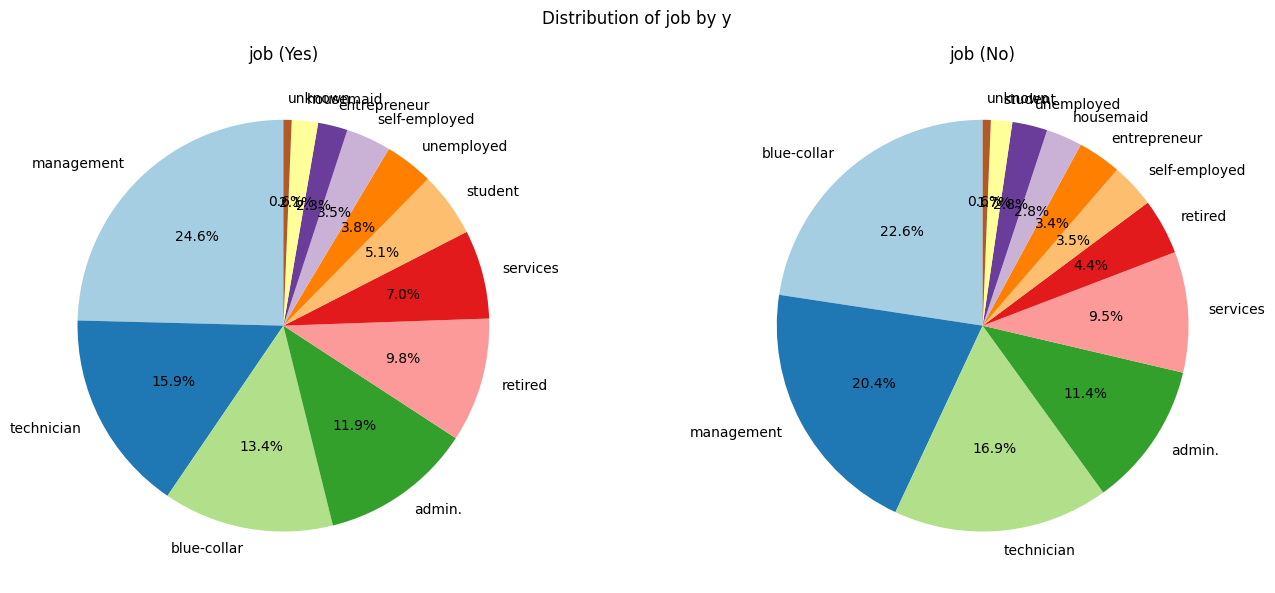

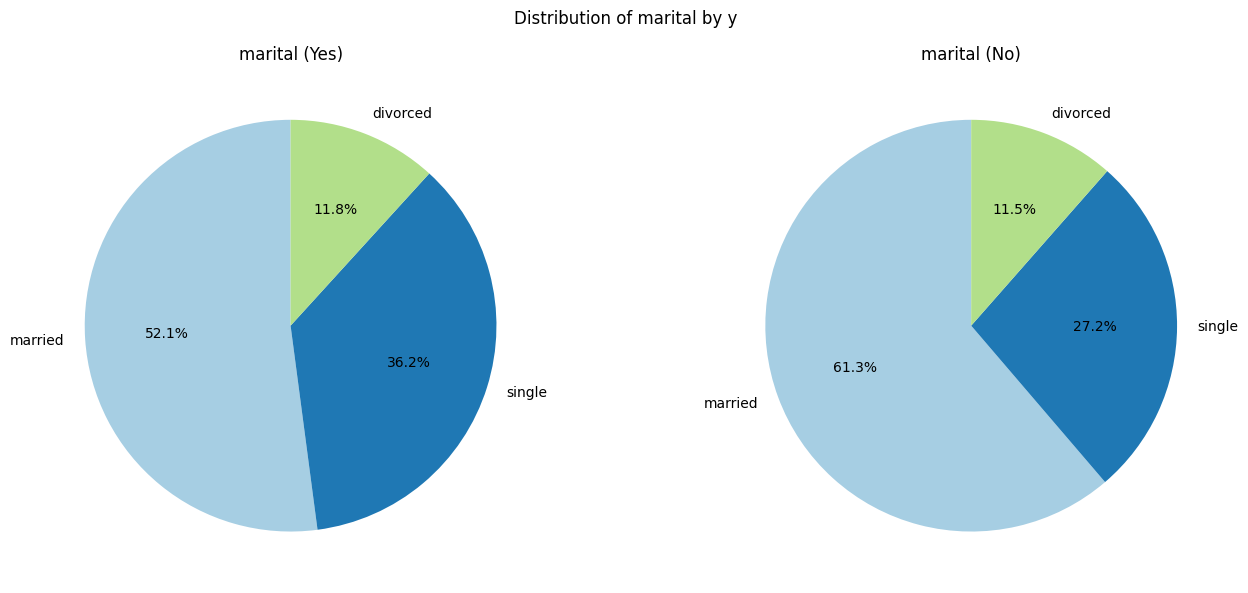

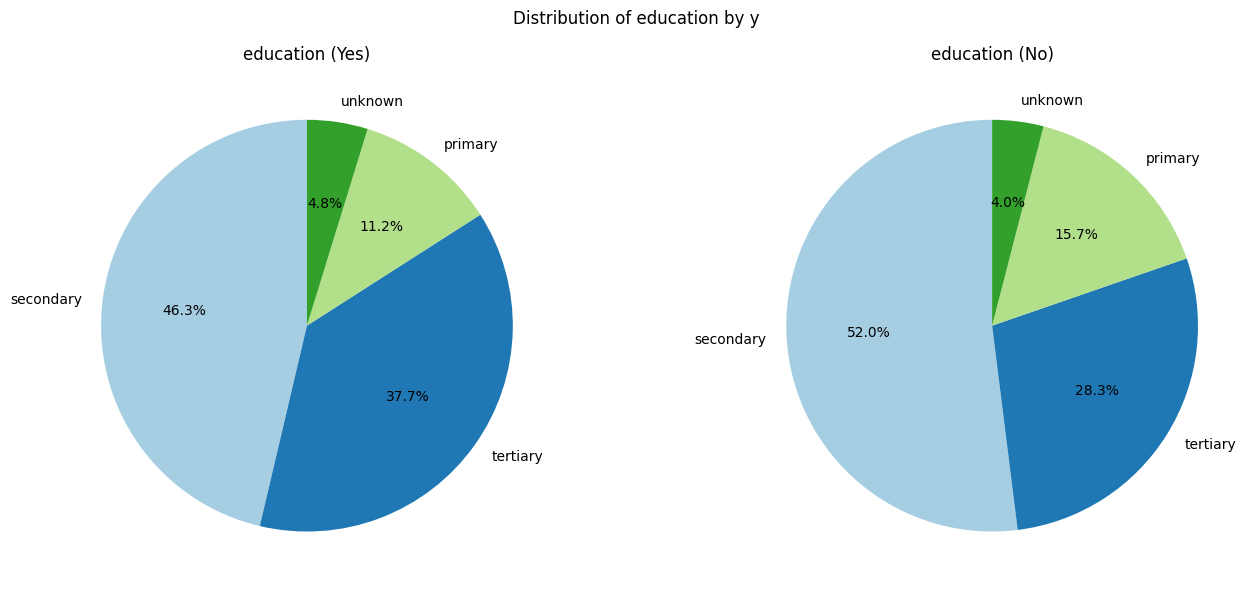

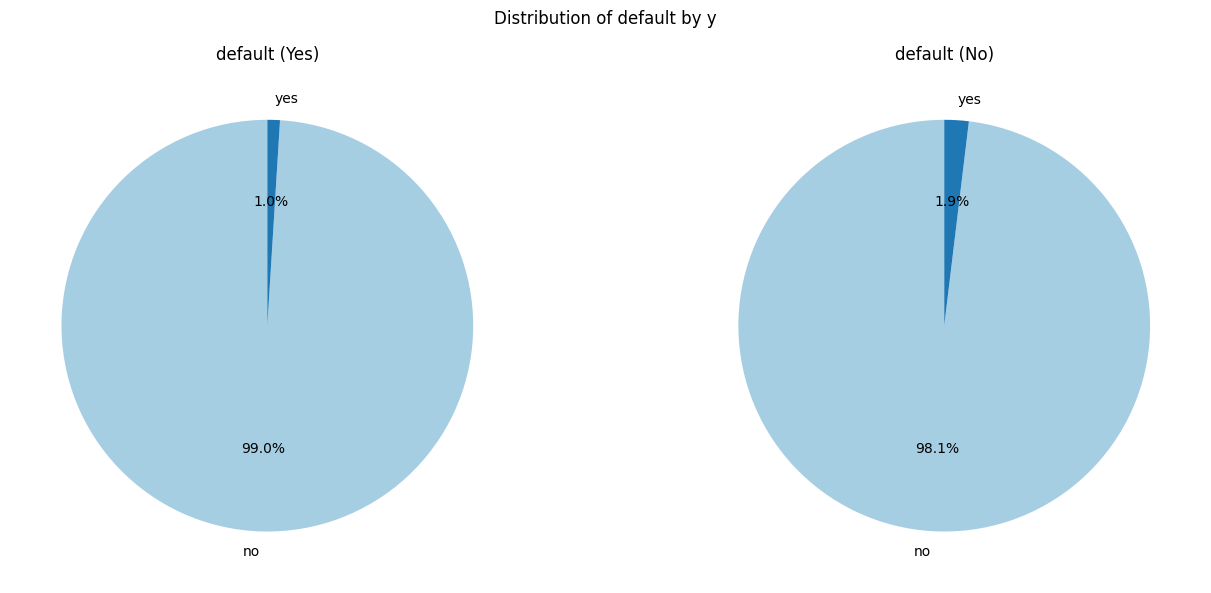

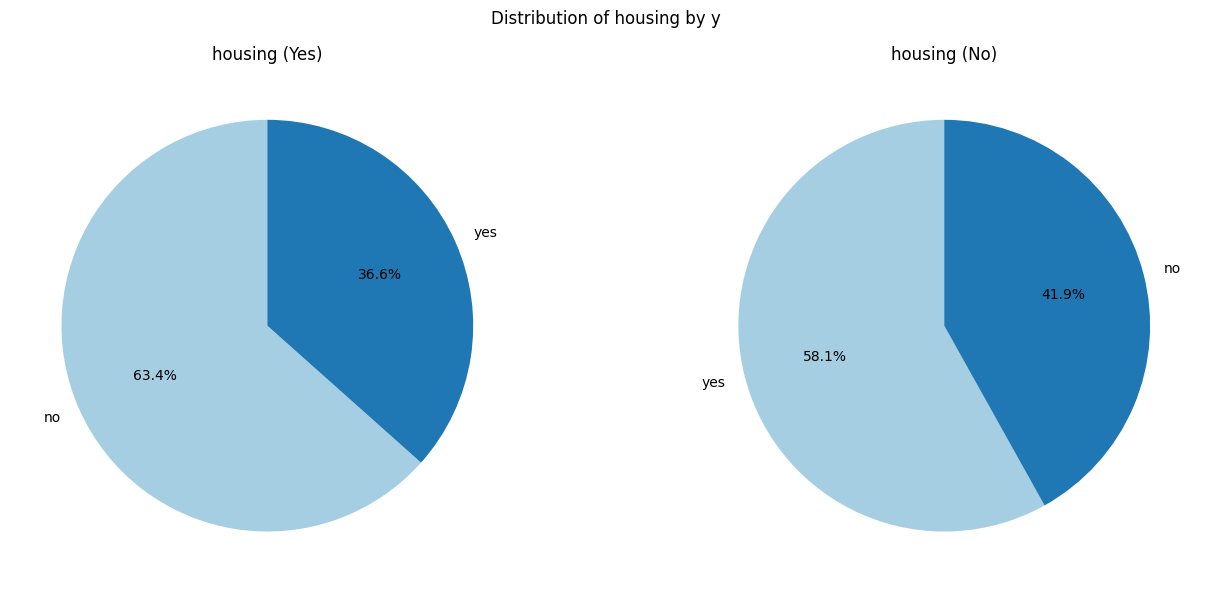

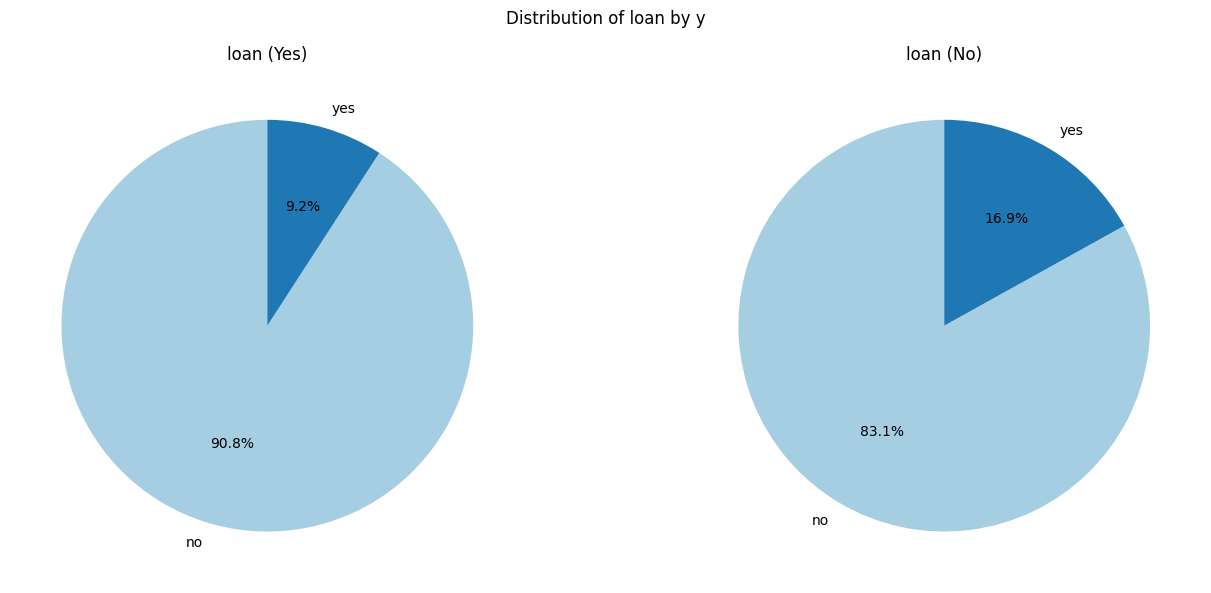

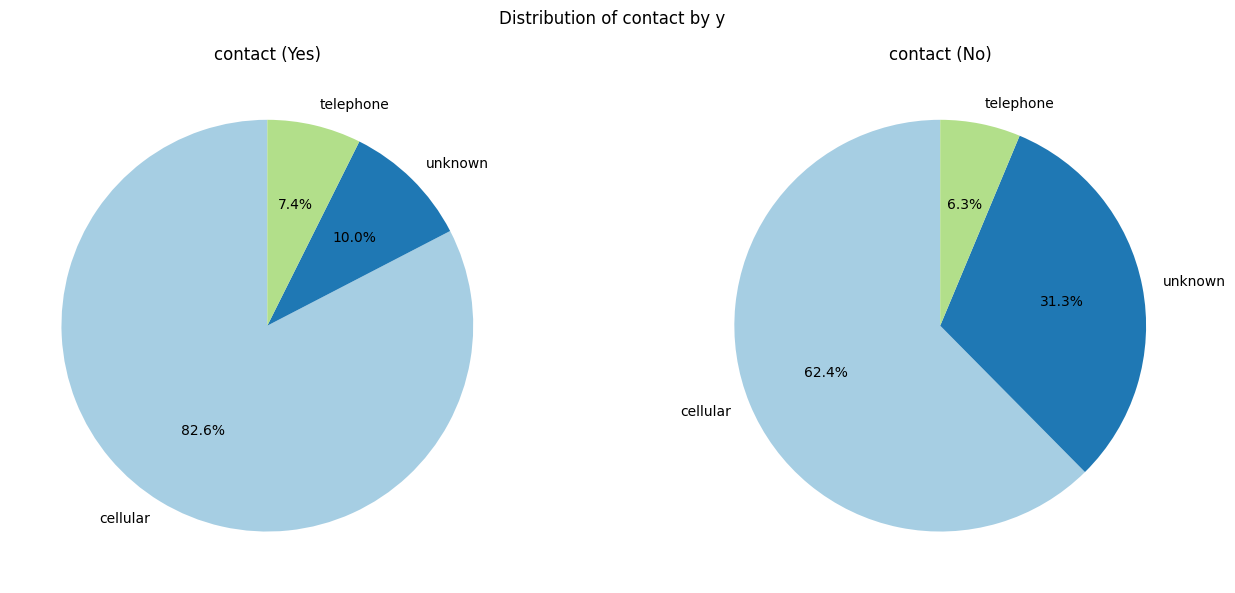

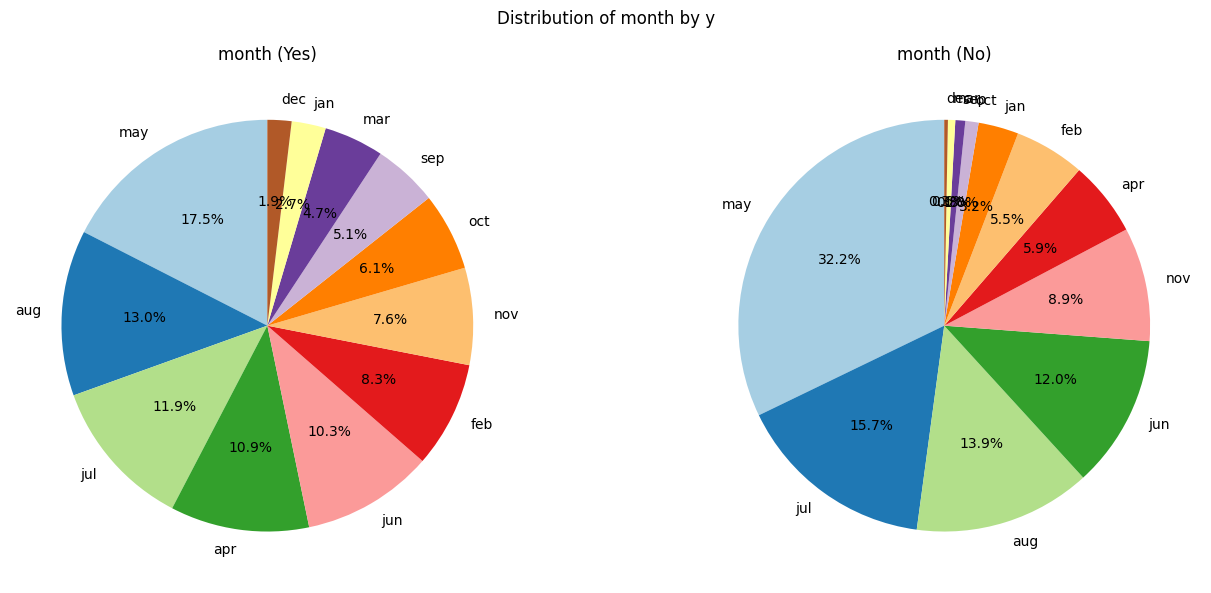

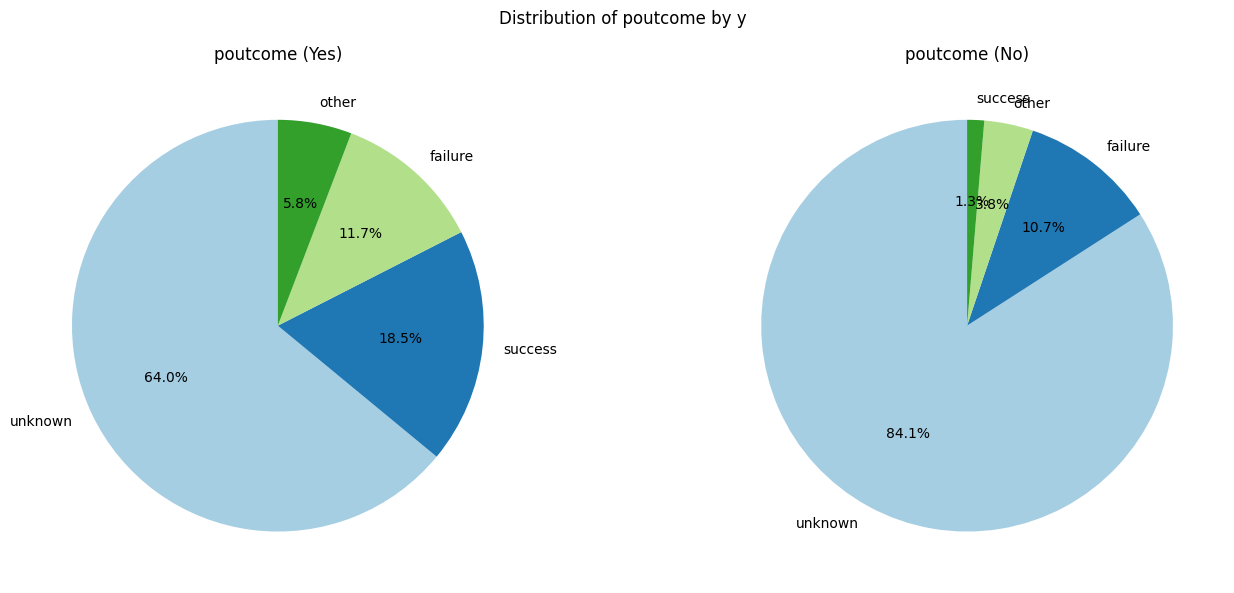

In [28]:
import matplotlib.pyplot as plt

# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Plot pie charts for each categorical variable, split by 'y'
for col in categorical_columns:
    # Create a figure with two subplots: one for 'yes' and one for 'no'
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    
    # Pie chart for 'yes' responses
    yes_data = df[df['y'] == 'yes'][col].value_counts()
    axes[0].pie(yes_data, labels=yes_data.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    axes[0].set_title(f'{col} (Yes)')
    
    # Pie chart for 'no' responses
    no_data = df[df['y'] == 'no'][col].value_counts()
    axes[1].pie(no_data, labels=no_data.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    axes[1].set_title(f'{col} (No)')
    
    # Display the pie charts
    plt.suptitle(f'Distribution of {col} by y')
    plt.tight_layout()
    plt.show()


In [29]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Initialize a dictionary to store results
chi2_results = {}

# Perform Chi-Square Test for each categorical variable
for col in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df[col], df['y'])
    
    # Perform the Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Store the results
    chi2_results[col] = {'Chi2 Statistic': chi2, 'p-value': p}

# Convert the results to a DataFrame for better readability
chi2_results_df = pd.DataFrame(chi2_results).T

# Print the Chi-Square test results
print(chi2_results_df)


           Chi2 Statistic        p-value
job            836.105488  3.337122e-172
marital        196.495946   2.145100e-43
education      238.923506   1.626656e-51
default         22.202250   2.453861e-06
housing        874.822449  2.918798e-192
loan           209.616980   1.665061e-47
contact       1035.714225  1.251738e-225
month         3061.838938   0.000000e+00
poutcome      4391.506589   0.000000e+00


In [30]:
### categorical douyou yingxiang

In [31]:
### modelling

In [32]:
# List of categorical and numerical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Only select 'duration' as the numerical column
numerical_columns = ['duration']

# Display the selected columns to verify
print("Categorical columns:", categorical_columns)
print("Numerical column (duration):", numerical_columns)


Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical column (duration): ['duration']


In [33]:
import numpy as np

# Create a new column for the log-transformed 'duration'
df['duration_log'] = np.log(df['duration'] + 1)

# Verify the log transformation
print(df[['duration', 'duration_log']].head())


   duration  duration_log
0       261      5.568345
1       151      5.023881
2        76      4.343805
3        92      4.532599
4       198      5.293305


In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Define the preprocessing for categorical data (One-Hot Encoding)
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Define the preprocessing for the log-transformed 'duration_log' (MinMax Scaling)
numerical_transformer = MinMaxScaler()

# Combine the preprocessing for categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['duration_log']),  # Only 'duration_log'
        ('cat', categorical_transformer, categorical_columns)  # Categorical columns
    ])

# Define the pipeline that first transforms the data
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


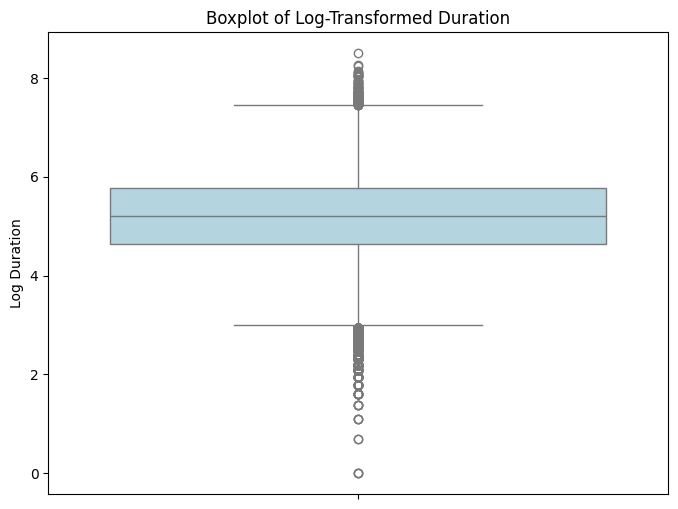

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for 'duration_log'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['duration_log'], color='lightblue')
plt.title('Boxplot of Log-Transformed Duration')
plt.ylabel('Log Duration')

# Display the plot
plt.show()


In [36]:
# Define the target variable and feature set
X = df.drop(columns=['y'])  # Drop the target variable 'y'
y = df['y'].map({'yes': 1, 'no': 0})  # Convert 'y' to binary (1 for 'yes', 0 for 'no')

# Verify the shapes of X and y
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)


Shape of X (features): (45211, 18)
Shape of y (target): (45211,)


In [37]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verify the shapes of the splits
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (31647, 18)
Shape of X_test: (13564, 18)
Shape of y_train: (31647,)
Shape of y_test: (13564,)


In [38]:
from sklearn.neighbors import KNeighborsClassifier

# k-NN model pipeline
knn_model = Pipeline(steps=[('preprocessor', pipeline),
                            ('classifier', KNeighborsClassifier())])

# Train the k-NN model
knn_model.fit(X_train, y_train)

# Make predictions using the trained k-NN model
y_pred_knn = knn_model.predict(X_test)

# Verify the predictions
print("First 5 predictions (k-NN):", y_pred_knn[:5])


First 5 predictions (k-NN): [0 0 0 1 0]


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Logistic Regression model pipeline
log_reg_model = Pipeline(steps=[('preprocessor', pipeline),
                                ('classifier', LogisticRegression())])

# Train the Logistic Regression model
log_reg_model.fit(X_train, y_train)

# Make predictions using the trained Logistic Regression model
y_pred_log_reg = log_reg_model.predict(X_test)

# Verify the predictions
print("First 5 predictions (Logistic Regression):", y_pred_log_reg[:5])


First 5 predictions (Logistic Regression): [0 0 0 0 0]


In [40]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the Logistic Regression model
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Evaluate the k-NN model
print("\nk-NN Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


Logistic Regression Model Evaluation:
Accuracy: 0.9012828074314362
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11966
           1       0.66      0.34      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564


k-NN Model Evaluation:
Accuracy: 0.8902978472427012
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11966
           1       0.56      0.31      0.40      1598

    accuracy                           0.89     13564
   macro avg       0.74      0.64      0.67     13564
weighted avg       0.87      0.89      0.88     13564



In [43]:
# Define the target variable and feature set
X = df.drop(columns=['y'])  # Drop the target variable 'y'
y = df['y'].map({'yes': 1, 'no': 0})  # Convert 'y' to binary (1 for 'yes', 0 for 'no')

# Verify the shapes of X and y
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)


Shape of X (features): (45211, 18)
Shape of y (target): (45211,)


In [44]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verify the shapes of the splits
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (31647, 18)
Shape of X_test: (13564, 18)
Shape of y_train: (31647,)
Shape of y_test: (13564,)


In [45]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import numpy as np

# Initialize the k-NN classifier within a pipeline
knn = Pipeline(steps=[('preprocessor', pipeline),
                       ('classifier', KNeighborsClassifier())])

# Define the scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform 5-fold cross-validation for k-NN model
knn_scores = cross_validate(knn, X_train, y_train, scoring=scoring, cv=5)

# Calculate mean scores for k-NN model
knn_accuracy = np.mean(knn_scores['test_accuracy'])
knn_recall = np.mean(knn_scores['test_recall'])
knn_precision = np.mean(knn_scores['test_precision'])
knn_f1 = np.mean(knn_scores['test_f1'])

# Print k-NN evaluation results
print(f"KNN Mean Accuracy: {knn_accuracy}")
print(f"KNN Mean Recall: {knn_recall}")
print(f"KNN Mean Precision: {knn_precision}")
print(f"KNN Mean F1 Score: {knn_f1}")


KNN Mean Accuracy: 0.8913640687554493
KNN Mean Recall: 0.29829330634307694
KNN Mean Precision: 0.5649056115527863
KNN Mean F1 Score: 0.39040433095607396


In [46]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier within a pipeline
logreg = Pipeline(steps=[('preprocessor', pipeline),
                         ('classifier', LogisticRegression())])

# Perform 5-fold cross-validation for Logistic Regression model
logreg_scores = cross_validate(logreg, X_train, y_train, scoring=scoring, cv=5)

# Calculate mean scores for Logistic Regression model
logreg_accuracy = np.mean(logreg_scores['test_accuracy'])
logreg_recall = np.mean(logreg_scores['test_recall'])
logreg_precision = np.mean(logreg_scores['test_precision'])
logreg_f1 = np.mean(logreg_scores['test_f1'])

# Print Logistic Regression evaluation results
print(f"Logistic Regression Mean Accuracy: {logreg_accuracy}")
print(f"Logistic Regression Mean Recall: {logreg_recall}")
print(f"Logistic Regression Mean Precision: {logreg_precision}")
print(f"Logistic Regression Mean F1 Score: {logreg_f1}")


Logistic Regression Mean Accuracy: 0.9023921131370253
Logistic Regression Mean Recall: 0.33784760039751954
Logistic Regression Mean Precision: 0.6590996969936309
Logistic Regression Mean F1 Score: 0.4466786863695826


In [47]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create a pipeline with preprocessor and KNN model
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Use the preprocessor you have already built
    ('classifier', KNeighborsClassifier())
])

# Define hyperparameter grid for KNN
knn_param_grid = {
    'classifier__n_neighbors': [5, 7, 9, 15, 35, 45, 55],  # Number of neighbors
    'classifier__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

# Use GridSearchCV to find the best hyperparameter combination
knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=5, verbose=1, scoring='f1')

# Fit the GridSearchCV to find the best k-NN model
knn_grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination for KNN
print("Best hyperparameters for KNN:", knn_grid_search.best_params_)


Fitting 5 folds for each of 42 candidates, totalling 210 fits
